<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [2]:
# Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# reading

from pandas import read_hdf

df_final_train = read_hdf('/content/drive/MyDrive/Case Studies/Facebook/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test  = read_hdf('//content/drive/MyDrive/Case Studies/Facebook/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [6]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [7]:
y_train = df_final_train.indicator_link
y_test  = df_final_test.indicator_link

In [8]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis = 1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis  = 1,inplace=True)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595
Estimators =  500 Train Score 0.9238963240449108 test Score 0.9162681945526931
CPU times: user 4min 29s, sys: 1.19 s, total: 4min 30s
Wall time: 2min 22s


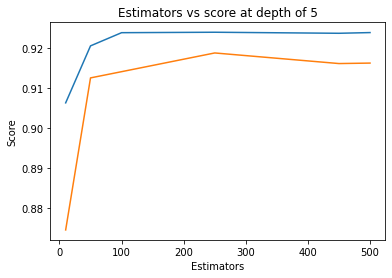

In [12]:
%%time 

estimators = [10,50,100,250,450,500]

train_scores = []
test_scores  = []

for i in estimators:
    clf = RandomForestClassifier( bootstrap=True, class_weight=None, criterion='gini',
                                  max_depth = 5, max_features = 'auto', max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0,
                                  min_samples_leaf = 52, min_samples_split = 120,
                                  min_weight_fraction_leaf = 0.0, n_estimators = i, n_jobs =-1,
                                  random_state = 25,warm_start = False)
    
    clf.fit(df_final_train,y_train) # fitting the classifier
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc  = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)

    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.plot(estimators,train_scores,label = 'Train Score')
plt.plot(estimators,test_scores,label  = 'Test Score')

plt.xlabel('Estimators')
plt.ylabel('Score')

plt.title('Estimators vs score at depth of 5')

In [14]:
# here we can see as the number of estimators increases test score also increases till Estimators = 250 and then it starts decreasingf again .

**min_samples_leaf**

* The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

**min_samples_split**

* The minimum number of samples required to split an internal node

https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

depth =  3 Train Score 0.8964289081404971 test Score 0.8774484755578266
depth =  9 Train Score 0.9581477820464481 test Score 0.9245867115931348
depth =  11 Train Score 0.9617793659333854 test Score 0.9251935375294513
depth =  15 Train Score 0.9639261063743403 test Score 0.9265346492981754
depth =  20 Train Score 0.9638992101683215 test Score 0.926801541020189
depth =  35 Train Score 0.964 test Score 0.926885749773689
depth =  50 Train Score 0.964 test Score 0.926885749773689
depth =  70 Train Score 0.964 test Score 0.926885749773689
depth =  130 Train Score 0.964 test Score 0.926885749773689


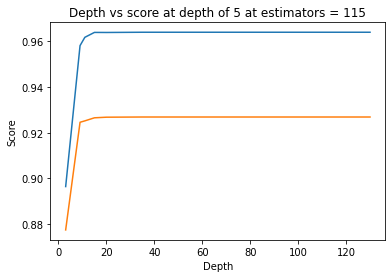

CPU times: user 10min 29s, sys: 2.36 s, total: 10min 31s
Wall time: 5min 35s


In [14]:
%%time 
depths = [3,9,11,15,20,35,50,70,130]

# since we have already get the optimal number of estimators now let's find optimal depth also .
# just remeber Random forest prefers Trees with high variance and low bias, hence more the depth better it is.

train_scores = []
test_scores = []

for i in depths:
    clf   = RandomForestClassifier( bootstrap = True, max_depth = i, max_features='auto',
                                    min_samples_leaf = 52, min_samples_split = 120,
                                    n_estimators = 250, n_jobs = -1,random_state = 25,verbose = 0)
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc  = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')

plt.xlabel('Depth')
plt.ylabel('Score')

plt.title('Depth vs score at depth of 5 at estimators = 250')

plt.show()

* The Train score and test score are similar after depth = 35 . Hence we will take optimal Depth = 35

**HyperParamter Tuning using RandomizedSearchCV**

In [19]:
%%time 
# Wall time: 6min 28s

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators" :sp_randint(150,250),
              "max_depth"    : sp_randint(25,45),
              "min_samples_split" : sp_randint(110,190),
              "min_samples_leaf"  : sp_randint(25,65)}

clf = RandomForestClassifier(random_state = 25,n_jobs = -1)

rf_random = RandomizedSearchCV(clf, param_distributions = param_dist,
                               n_iter = 7,cv = 3,scoring = 'f1',random_state = 25,n_jobs = -1,verbose = 3)

rf_random.fit(df_final_train,y_train)

print("Best Parameter :- ",rf_random.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameter :-  {'max_depth': 30, 'min_samples_leaf': 26, 'min_samples_split': 149, 'n_estimators': 153}
CPU times: user 47.1 s, sys: 279 ms, total: 47.4 s
Wall time: 6min 28s


In [20]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=30, min_samples_leaf=26, min_samples_split=149,
                       n_estimators=153, n_jobs=-1, random_state=25)


In [21]:
clf = RandomForestClassifier( max_depth=30, min_samples_leaf=26, min_samples_split=149,
                              n_estimators=153, n_jobs=-1, random_state=25)

In [23]:
clf.fit(df_final_train,y_train)

y_train_pred = clf.predict(df_final_train)
y_test_pred  = clf.predict(df_final_test)

In [24]:
from sklearn.metrics import f1_score

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score' ,f1_score(y_test,y_test_pred))

Train f1 score 0.9665735907085914
Test f1 score 0.9274315471190996


In [25]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


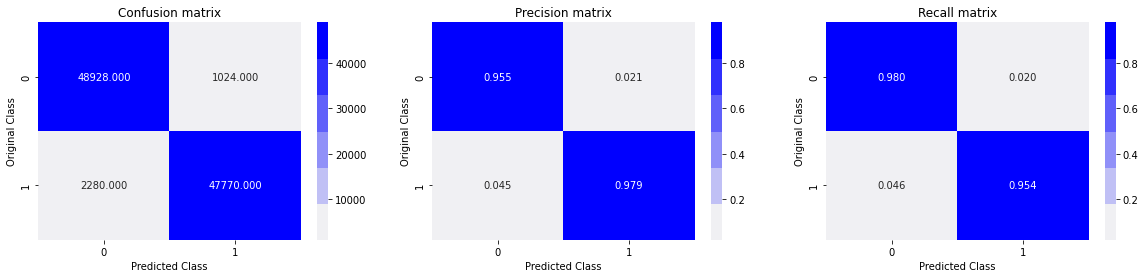

Test confusion_matrix


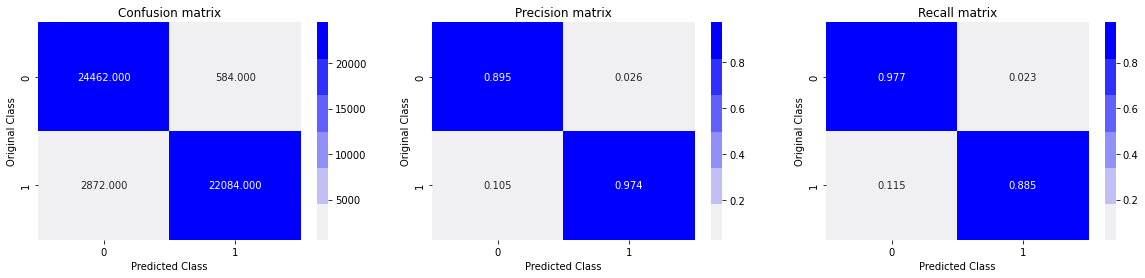

In [26]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)

print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

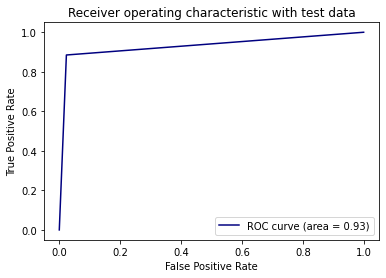

In [27]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc      = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'navy',label = 'ROC curve (area = %0.2f)' % auc_sc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic with test data')
plt.legend()

plt.show()

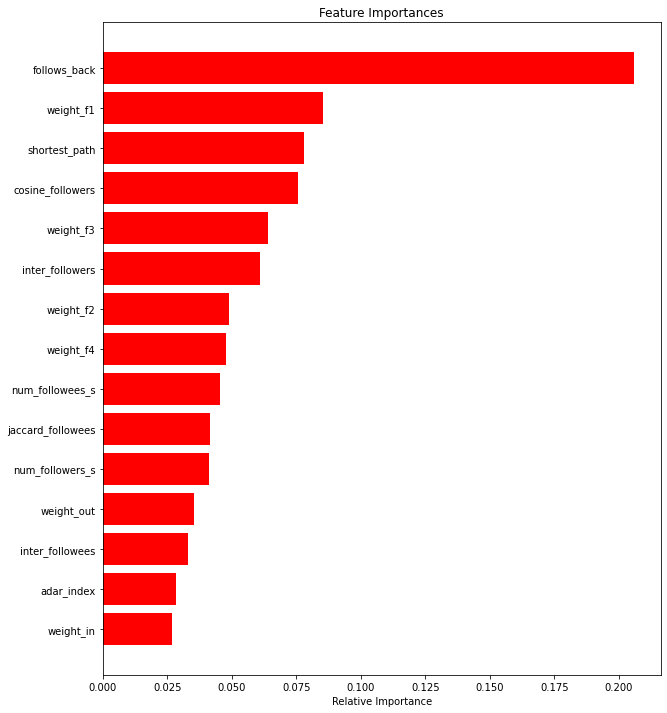

In [28]:
features    = df_final_train.columns
importances = clf.feature_importances_

indices = (np.argsort(importances))[-15:] # extracting 15 most important features

plt.figure(figsize=(10,12))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()